
# Final Report
## Wine Clustering Project


## Goals
* Construct an ML model that predicts wine quality 
* Find the key drivers of wine quality 
* Deliver a report to the data science team 
* Deliver a presentation of findings to the Data Science team

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import scipy.stats as stats
import seaborn as sns



import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import wrangle
import functions

## Acquire

* Data acquired from https://data.world/food/wine-quality
    * Seperate red and white wine .csv files were imported
    * Files were concated with a column added to distinguish red from white wines 
* It contained 6498 rows and 13 columns
* The data was aquired on 23 MAY 2023
* Each row represents a unique wine
* Each column represents a feature of the wine


## Prepare

* Initial preperation
    


### Data Dictionary

| Feature | Definition (measurement)|
|:--------|:-----------|
|Fixed Acidity| The fixed amount of tartaric acid. (g/L)|
|Volatile Acidity| A wine's acetic acid; (High Volatility = High Vinegar-like smell). (g/L)|
|Citric Acid| The amount of citric acid; (Raises acidity, Lowers shelf-life). (g/L)|
|Residual Sugar| Leftover sugars after fermentation. (g/L)|
|Chlorides| Increases sodium levels; (Affects color, clarity, flavor, aroma). (g/L)|
|Free Sulfur Dioxide| Related to pH. Determines how much SO2 is available. (Increases shelf-life, decreases palatability). (mg/L)|
|Total Sulfur Dioxide| Summation of free and bound SO2. (Limited to 350ppm: 0-150, low-processed, 150+ highly processed). (mg/L)|
|Density| Between 1.08 and 1.09. (Insight into fermentation process of yeast growth). (g/L)|
|pH| 2.5: more acidic - 4.5: less acidic (range)|
|Sulphates| Added to stop fermentation (Preservative) (g/L)|
|Alcohol| Related to Residual Sugars. By-product of fermentation process (vol%)|
|Quality| Score assigned between 0 and 10; 0=low, 10=best|
|Wine type| Classifies color of wine ; Red or White|

### Bring in Data for Exploration

In [2]:
# Bring in data .csv 
df = wrangle.get_wine()
# Split data
train, validate, test = wrangle.split_data(df)

train -> (3897, 14), 59.98%
validate -> (1300, 14),20.01%
test -> (1300, 14), 20.01%


### Sneak Peak at the Data


In [3]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
3353,6.4,0.16,0.28,2.2,0.042,0.033,0.093,0.99140,3.31,0.43,11.1,6,white,1
2032,7.2,0.55,0.09,1.5,0.108,0.016,0.151,0.99380,3.07,0.57,9.2,4,white,1
6223,6.4,0.40,0.25,4.2,0.032,0.015,0.091,0.98988,3.26,0.52,13.1,6,white,1


### Summary of Data

In [4]:
train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,white
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,7.234770,0.338758,0.320719,5.533423,0.056252,0.030800,0.116135,0.994752,3.217865,0.530742,10.479193,5.812933,0.753400
std,1.302097,0.164181,0.146233,4.828980,0.035599,0.018071,0.056967,0.003022,0.161605,0.148456,1.192935,0.867007,0.431087
min,3.800000,0.080000,0.000000,0.600000,0.012000,0.001000,0.007000,0.987110,2.740000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,0.017000,0.078000,0.992400,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,0.029000,0.118000,0.994940,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.200000,0.065000,0.042000,0.156000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.610000,0.289000,0.440000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## Exploration

* All features independently evaluated against wine quality
* alpha =.05 for all statistics ran
* For catagorical features T-tests were used


### 1. Is alcohol predictive of quality?

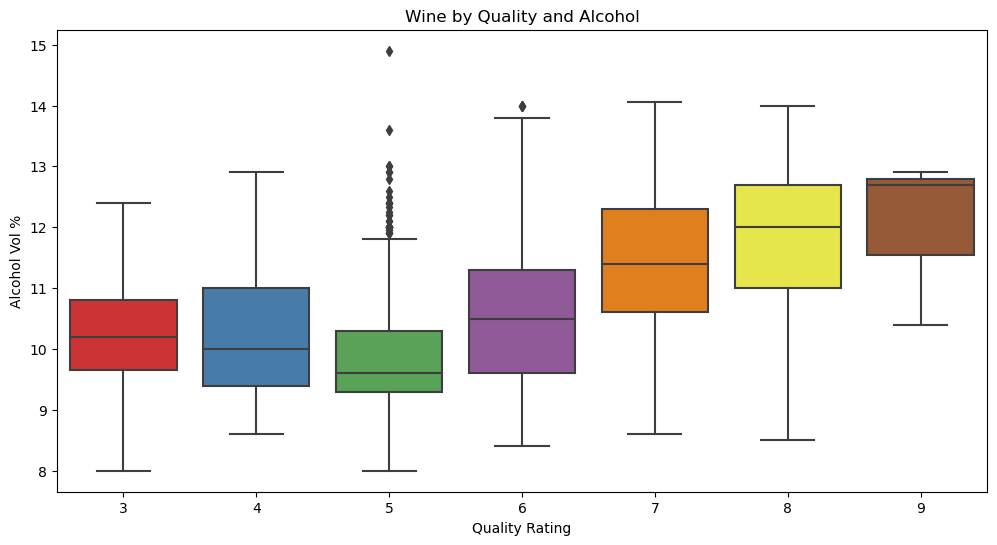

In [5]:
# Get visualizaions
functions.get_alcohol_quality(train)

#### Charting Observations: Alcohol
* As alcohol content increases, the wine quality rating tends to increase as well.
* Conversely, as alcohol content decreases, the wine quality rating tends to decrease.

####  Statistics: Alcohol


##### Hypothisis: Alcohol
$H_0$ : alcohol is independent of quality<br>
$H_a$ : alcohol is not independent of quality

In [6]:
# Running stat test
functions.run_alcohol_ttest(train)

,T-Statistic,P-Value,Decision
0,197.526362,0.0,Reject Null Hypothesis


#### Result
* Based on the result of our test, we can infer that alcohol content impacts wine quality. As alcohol content increases or decreases, wine quality rating increases and decreases respectively.

### 2. Is volatile acidity predictive of quality?

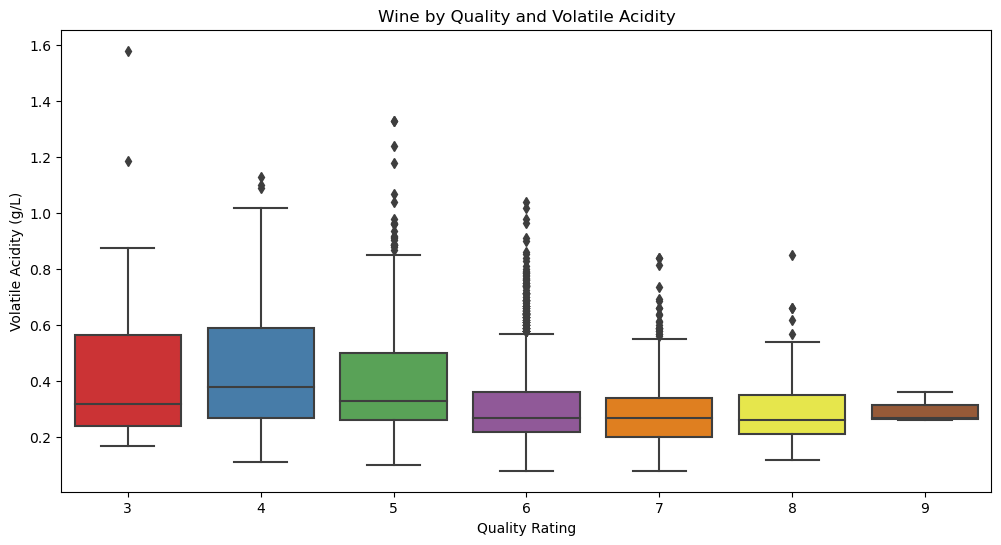

In [7]:
# Get visualizaions
functions.get_va_quality(train)

#### Charting Observations: Vaolatile Acidity
* Higher fluctuating or spread of volatile acidity results in a lower wine quality grade.
* Conversely, lower fluctuating or spread of volatile acidity results in a higher wine quality grade.

####  Statistics: Vaolatile Acidity


##### Hypothisis: Volatile Acidity
$H_0$ : Volatile acidity is independent of quality<br>
$H_a$ : Volatile acidity is not independent of quality

In [8]:
# Run stats
functions.run_volatile_acidity_ttest(train)

,T-Statistic,P-Value,Decision
0,-387.267364,0.0,Reject Null Hypothesis


#### Result
* Based on the results of our test, we can infer that volatile acidity impacts wine quality. The more that volatile acidity fluctuates the lower quality grade a wine receives and the less volatile acidity fluctuates the higher quality grade a wine receives.

### 3. Are sulphates predictive of quality?

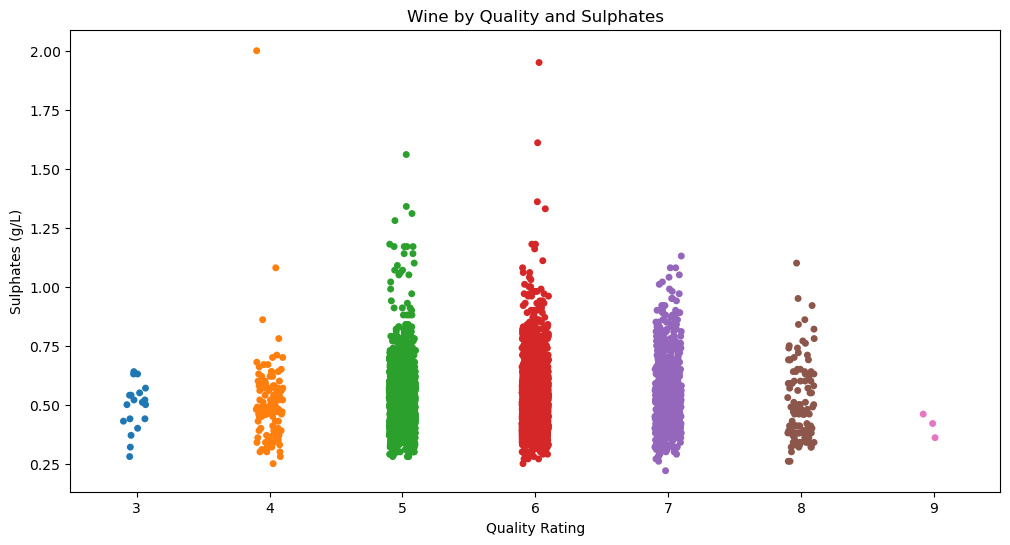

In [9]:
# Get visualizaions
functions.get_sulphate_quality(train)

#### Charting Observations: feature
* The number 
* there is a

####  Statistics: Sulphates


##### Hypothisis: Sulphates
$H_0$ : sulphates are independent of quality<br>
$H_a$ : sulphates are not independent of quality

In [10]:
# Running t-stat test
functions.run_sulphates_ttest(train)

,T-Statistic,P-Value,Decision
0,-374.870894,0.0,Reject Null Hypothesis


#### Result
explain

### 4. Is citric acid predictive of quality? 

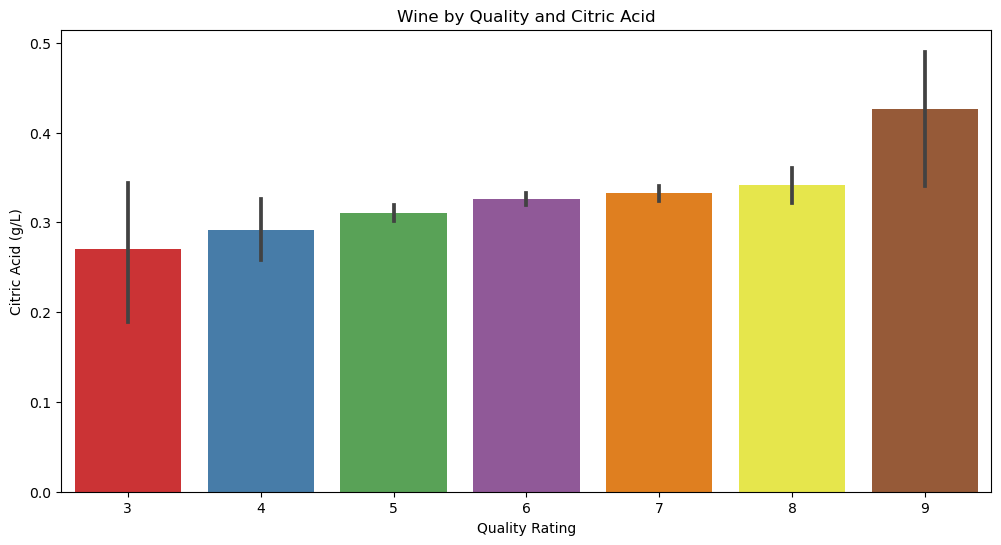

In [11]:
# Get visualizaions
functions.get_ca_quality(train)

#### Chart Observations: Citric Acid
* lot does appear 


####  Statistics: Citric Acid


##### Hypothisis: Citric Acid
$H_0$ : citric acid is independent of quality<br>
$H_a$ : sitric acid is not independent of quality

In [12]:
# Running stat test
functions.run_citric_acid_ttest(train)

,T-Statistic,P-Value,Decision
0,-389.941036,0.0,Reject Null Hypothesis


#### Result
* explian

## Exploration Summary
* All summary 
* A combination of these features should create a predictive model for wine quality

### Features we are moving to modeling with
* alcohol: strongest relationship to quality, will have a large impact on our model
* volatile_acidity: strong relationship to quality, will have a large impact on our model
* sulphates: strong relationship to quality, will have a large impact on our model
* citric_acid: strong relationship to quality, will have a large impact on our model
* free_sulfur_dioxide: moderate relationship to quality, will have a moderate impact on our model
* ph: moderate relationship to quality, will have a moderate impact on our model
* white: moderate relationship to quality, will have a moderate impact on our model
* fixed_acidity: weak relationship to quality, but will have a minor impact on our model
* residual_sugar: weak relationship to quality, but will have a minor impact on our model
* chlorides: weak relationship to quality, but will have a minor impact on our model
* density: weak relationship to quality, but will have a minor impact on our model
* quality: is our target variable

### Features not moving to modeling 
* total_sulfur_dioxide: this proved to be highly corolated to free_sulfur_dioxide, so one needed to be droped. We chose total_sulfur_dioxide since the level of free_sulfur_dioxide has a greater influence on the wines quality.
* wine_type: duplicated by white

## Clustering

## Modeling

### Introduction
* Before modeling we will be scaling 'any' and 'features'
*  primary evaluation metric 


In [13]:
# Scaling 
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = functions.scale_data(train, validate, test, ['alcohol', 'volatile_acidity','sulphates','citric_acid','free_sulfur_dioxide','ph','fixed_acidity','residual_sugar','white','chlorides','density'])

#### Baseline 

In [14]:
# get baseline 
functions.get_baseline(y_train)

,Baseline,Metric,Score
0,6.0,Accuracy,0.439569


In [15]:
# getting chart to provide the context of the target variable showing distribution of the values and baseline


###  Models

In [16]:
# running 4 models with preped data for modeling, retuning accuracy and recall 
functions.create_models(seed=123)
functions.get_models(train, validate, test)

,model,set,accuracy,recall
0,k_nearest_neighbors,train,0.558378,NaN
1,k_nearest_neighbors,validate,0.538462,NaN
2,logistic_regression,train,0.545548,NaN
3,logistic_regression,validate,0.527692,NaN
4,DecisionTreeClassifier,train,0.539902,NaN
5,DecisionTreeClassifier,validate,0.524615,NaN
6,random_forest,train,0.547344,NaN
7,random_forest,validate,0.531538,NaN


### Model Selection
*** observations
* All Models gave gave very similar results
    * All out performed the baseline R2
    * Polynomial Regression gave the best results on the train and validate sets
* I will use the Polynomial Regression model for the unseen Test data

### Test Model: best model


In [17]:
# running on test set


### Modeling Wrap 
* On the test set the model returned a 
    * beating the baseline 
    
* This model ##could## be used in production

## Conclusion

### Summary
* notes
* notes
* notes
* notes
### Recommendations
* notes
* notes

### Next Steps
* If provided more time to work on the project we would want to explore ###notes